In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/E-commerce Customer Behavior - Sheet1.csv")

In [3]:
df.head(3)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied


In [5]:
df.shape

(350, 11)

In [6]:
df.tail()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [8]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


There are no null value except in column Satisfaction Level has 2

In [9]:
df.duplicated().sum()

np.int64(0)

there is no duplicacy in data

In [10]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


when discribe the data we found not outlier in Age and Average Rating in min , max and mean

**here we analysis and visualization
**

In [12]:
Gender = df['Gender'].value_counts().reset_index()
Gender

,Gender,count
0,Female,175
1,Male,175


here we can analysis the gender counts

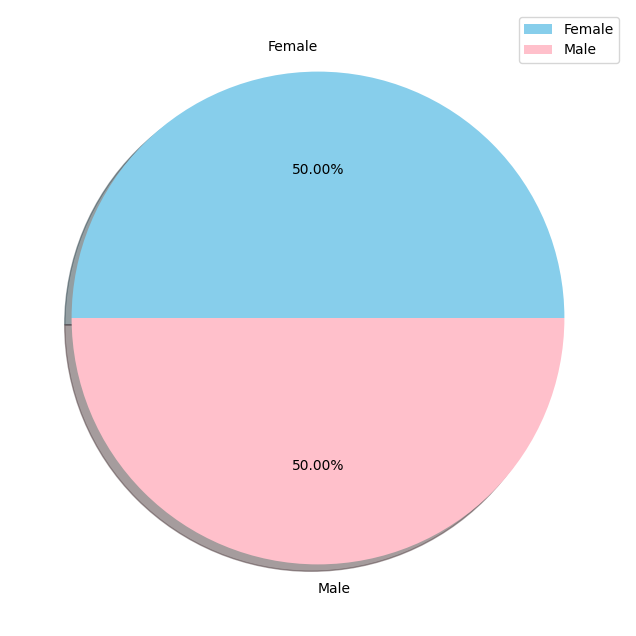

In [14]:
plt.figure(figsize=(8,8))
plt.pie(Gender['count'], colors=['skyblue', 'pink'],
        shadow=True,labels=Gender['Gender'],
        autopct='%1.2f%%'
       )
plt.legend()
plt.show()

on the behalf of visual analysis by pie chart , the diffrence b/w male and female is approxlly equal .

In [16]:
GenderwithAge = df.groupby('Gender')['Age'].value_counts().reset_index()
GenderwithAge

,Gender,Age,count
0,Female,43,25
1,Female,30,24
2,Female,31,24
3,Female,36,24
4,Female,37,24
5,Female,41,24
6,Female,32,9
7,Female,38,9
8,Female,42,9
9,Female,29,2


here we can analysis  which age and gender has higher purchaser.

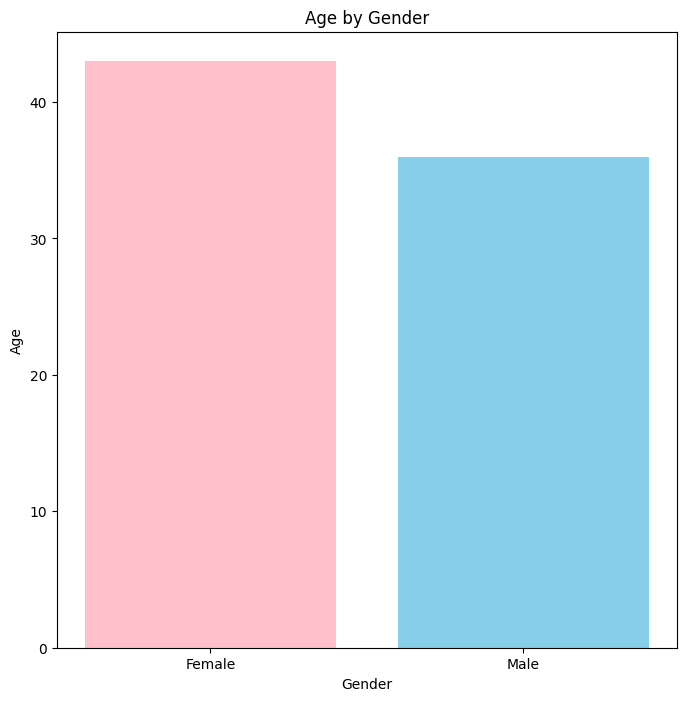

In [17]:
plt.figure(figsize=(8,8))
plt.bar(GenderwithAge['Gender'], GenderwithAge['Age'],
        color=['pink', 'skyblue'],
       )
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age by Gender')
plt.show()

on visualising the bar chart , e found that female gender have higher purchasers.

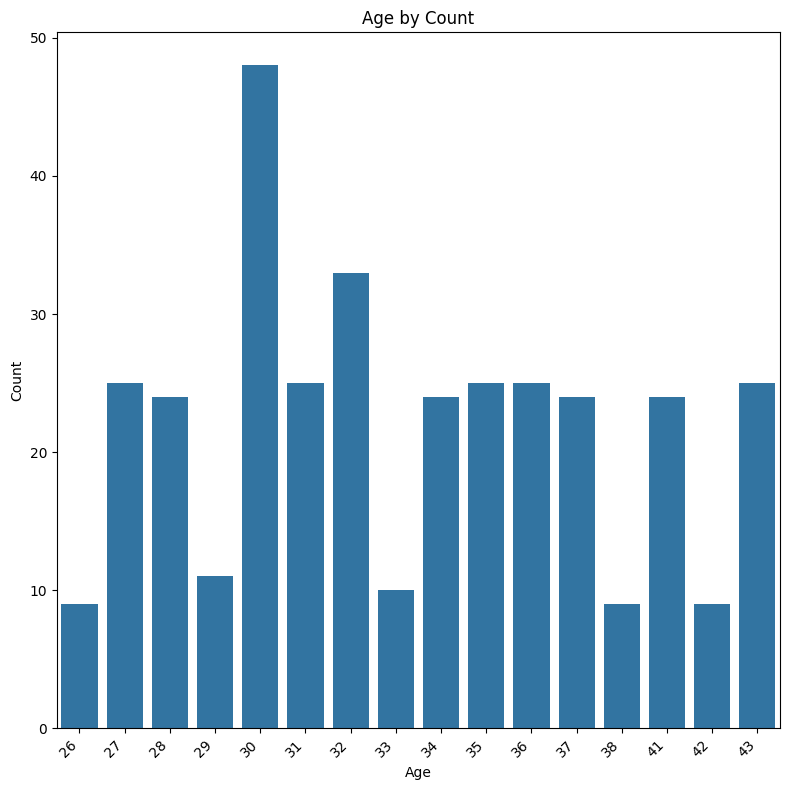

In [18]:
age_data = df['Age'].value_counts().reset_index()
plt.figure(figsize=(8, 8))
sns.barplot(data=age_data,x='Age', y='count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate the labels for better readability
plt.title('Age by Count')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

it is a visual analysis on age by count, which shows which age has higher count.

In [20]:
city = df['City']
city

,City
0,New York
1,Los Angeles
2,Chicago
3,San Francisco
4,Miami
...,...
345,Miami
346,Houston
347,New York
348,Los Angeles


In [21]:
Genderwithcity = df[['Gender' , 'City']].value_counts().reset_index()
Genderwithcity

,Gender,City,count
0,Male,Los Angeles,59
1,Female,Chicago,58
2,Female,New York,58
3,Female,Houston,58
4,Male,San Francisco,58
5,Male,Miami,57
6,Female,Miami,1
7,Male,New York,1


here we found which city has higher purchase customer

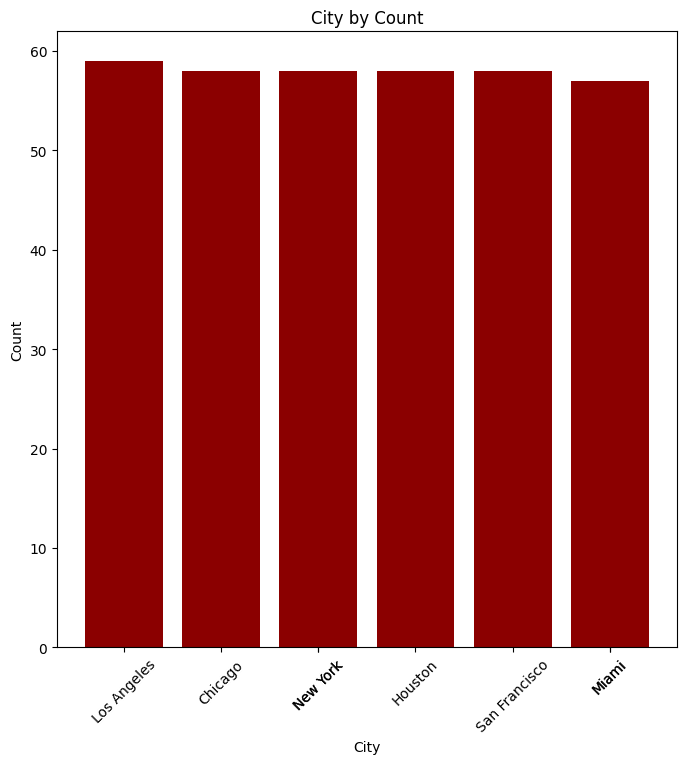

In [23]:
xticks = Genderwithcity['City']
plt.figure(figsize=(8,8))
plt.bar(Genderwithcity['City'], Genderwithcity['count'],
        color='darkred',
       )
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(xticks,rotation=45)
plt.title('City by Count')
plt.show()

it is the visual analysis with bar chart.which easily show which country have higher customer.

Number of every gender in City

In [24]:
Genderwithcity = df['City'].value_counts().reset_index()
Genderwithcity

,City,count
0,New York,59
1,Los Angeles,59
2,Chicago,58
3,San Francisco,58
4,Miami,58
5,Houston,58


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/mall (1).csv")

In [3]:
df.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
df = df.drop(columns = ['CustomerID', 'Genre'])
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
x = df.iloc[: ,[0,1]].values

In [7]:
from sklearn.cluster import KMeans


In [8]:
import matplotlib.pyplot as plt

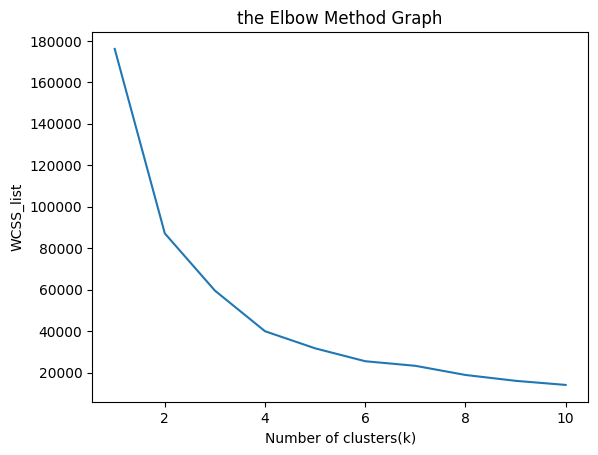

In [10]:
a = []

for i in range(1,11):
    b = KMeans(n_clusters = i, init='k-means++', random_state=0)
    b.fit(x)
    a.append(b.inertia_)

plt.plot(range(1,11), a)

plt.title("the Elbow Method Graph")
plt.xlabel("Number of clusters(k)")
plt.ylabel("WCSS_list")
plt.show()

# From the above plot, we can see that the elbow point is at 4. So the number of clusters is 4.

In [11]:
b = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_predict = b.fit_predict(x)

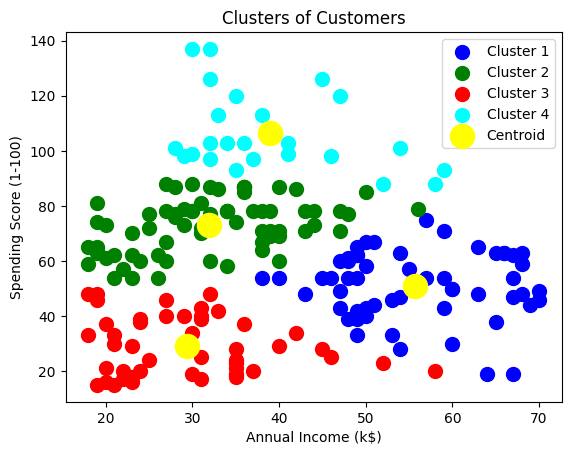

In [12]:
# Visualizing the clusters
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(b.cluster_centers_[:, 0], b.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [13]:
# What is unsupervised learning?
# How does kmeans clustering work?
# What is the elbow method and in this what is wcss?
# what is centroid and in a cluster how a point is consider as a centroid?